# Activities List
Check the previous Done Activities in the [link](./Activities.md).

### Tasks 
Hint: use the file  ```Data_Marketing_Customer_Analysis_Round3.csv```
- check if there are highly correlated features and drop them (if there are any).
- One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint:  check Dropfirst option).
- for the first iteration, we will focus on the  numericals data (numericals data frame) as our data source.

**(Optional Task)**

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

1. varA
- Use minmax transform to bring varA's values into the range [0,1].
- Check that varA has been rescaled using a displot or a histogram
2. varB
- Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution.
- Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

Hints:

1. Import transformers from the sklearn library
```from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler```
- To reduce the skew and standardize a column, PowerTransformer from sklearn has two options (box-cox and yeo-johnson)
- To rescale the column, use the MinMaxScaler transform.
2. Format the column correctly for the transformer.
The sklearn transformers expect numpy.ndarray object types as input. To take a pandas column and transform it into the correct form for PowerTransform and Minmax_Scaler use the to_numpy() and reshape(-1,1) methods.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/repicao/IH_AB_DA_FT_MAY_2023/master/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [7]:
corr_matrix = df.corr().abs()
corr_matrix

/var/folders/ry/gjr8200n3dlbt309r1yzb4480000gn/T/ipykernel_72830/3841586144.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,0.032371,0.016789,0.232849
income,0.003732,1.000000,0.002431,0.026564,0.003846,0.018903,0.004461,0.111221
monthly_premium_auto,0.404235,0.002431,1.000000,0.010036,0.019696,0.008811,0.018805,0.630149
months_since_last_claim,0.011912,0.026564,0.010036,1.000000,0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,0.034086,1.000000,0.002554,0.009719,0.004186
number_of_open_complaints,0.032371,0.018903,0.008811,0.001204,0.002554,1.000000,0.000303,0.010668
number_of_policies,0.016789,0.004461,0.018805,0.000814,0.009719,0.000303,1.000000,0.008019
total_claim_amount,0.232849,0.111221,0.630149,0.013874,0.004186,0.010668,0.008019,1.000000


In [8]:
corr_matrix = corr_matrix.round(2)
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.00,0.40,0.01,0.02,0.03,0.02,0.23
income,0.00,1.00,0.00,0.03,0.00,0.02,0.00,0.11
monthly_premium_auto,0.40,0.00,1.00,0.01,0.02,0.01,0.02,0.63
months_since_last_claim,0.01,0.03,0.01,1.00,0.03,0.00,0.00,0.01
months_since_policy_inception,0.02,0.00,0.02,0.03,1.00,0.00,0.01,0.00
number_of_open_complaints,0.03,0.02,0.01,0.00,0.00,1.00,0.00,0.01
number_of_policies,0.02,0.00,0.02,0.00,0.01,0.00,1.00,0.01
total_claim_amount,0.23,0.11,0.63,0.01,0.00,0.01,0.01,1.00


In [9]:
numerical = df.select_dtypes(include=[np.number])

# Select the categorical columns
categorical = df.select_dtypes(include=[object])

numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [10]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [14]:
# Perform one-hot encoding with drop-first option
categorical_encoded = pd.get_dummies(categorical, drop_first=True)
categorical_encoded

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [15]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

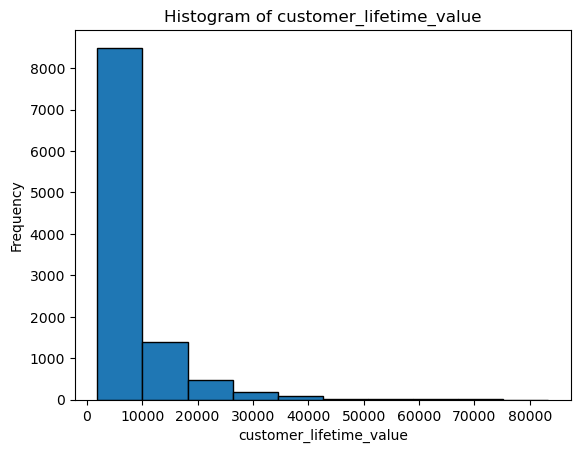

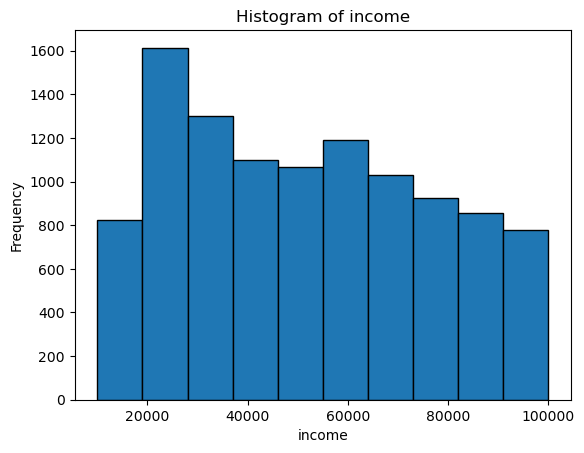

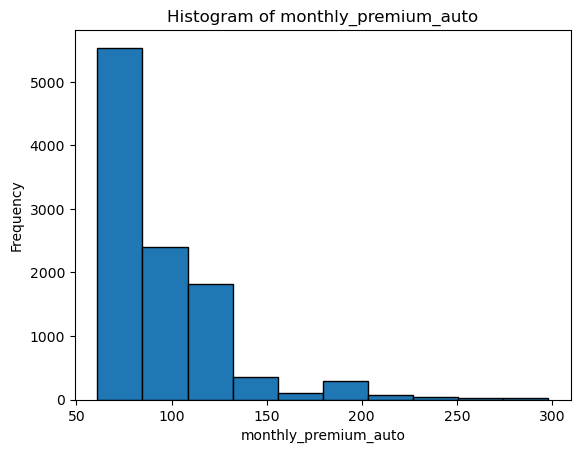

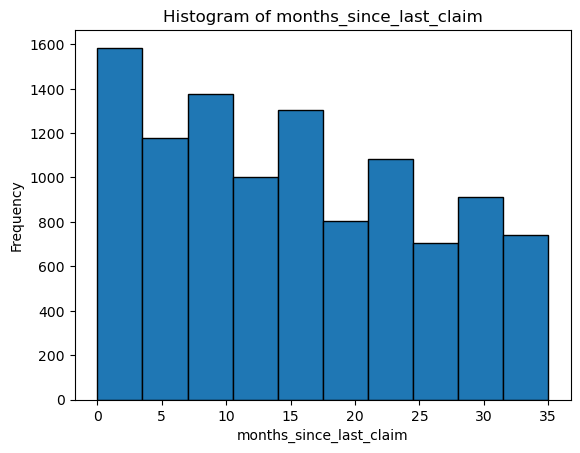

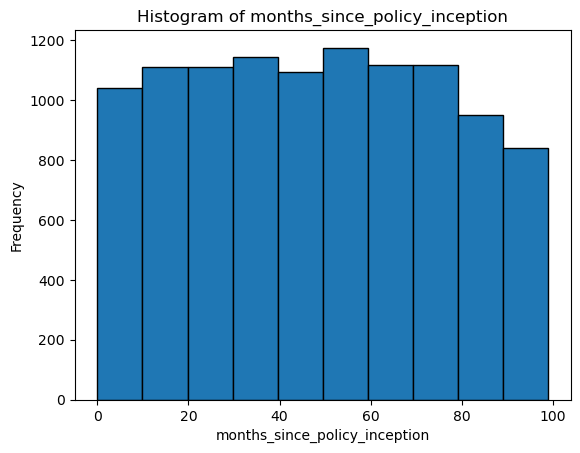

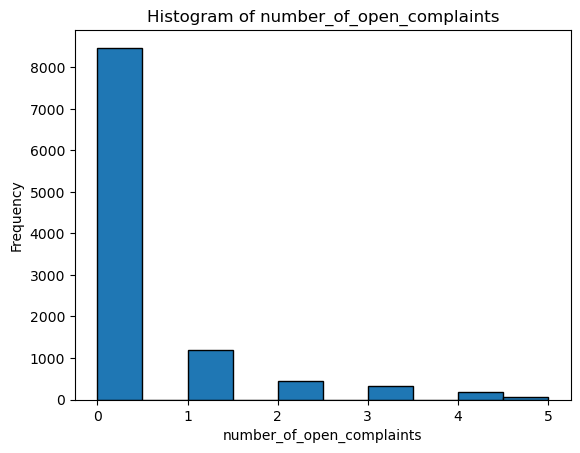

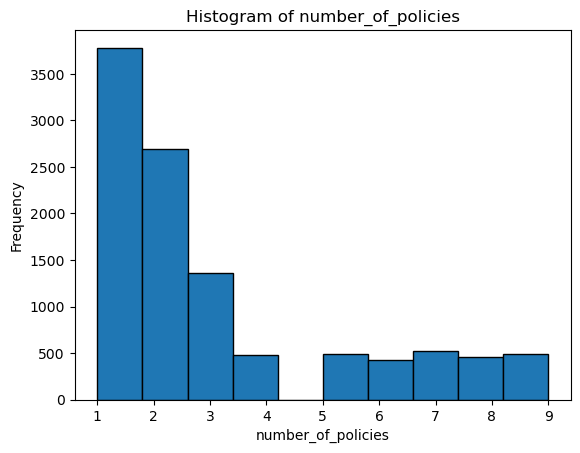

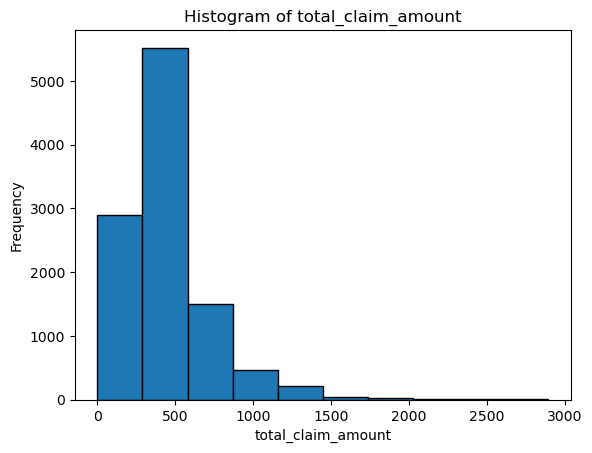

In [22]:
#histograms

import matplotlib.pyplot as plt

for column in numerical.columns:
    plt.figure()
    plt.hist(numerical[column], bins=10, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)
    plt.show()


In [37]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

#transform the variable months_since_policy_inception and create'varA_scaled'
numerical['varA_scaled'] = scaler.fit_transform(numerical[['months_since_policy_inception']])
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,varA_scaled,varB_scaled
0,4809,48029,61,7,52,0,9,292,0.525253,-0.465726
1,2228,92260,64,3,26,0,1,744,0.262626,-0.841022
2,14947,22139,100,34,31,0,2,480,0.313131,1.008413
3,22332,49078,97,10,3,0,2,484,0.030303,2.082245
4,9025,23675,117,33,31,0,7,707,0.313131,0.147311
...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,0.404040,1.097984
10685,5259,61146,65,7,68,0,6,273,0.686869,-0.400293
10686,23893,39837,201,11,63,0,2,381,0.636364,2.309226
10687,11971,64195,158,0,27,4,6,618,0.272727,0.575681


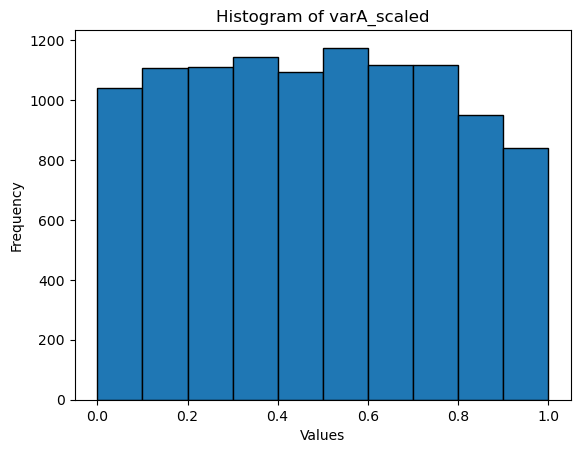

In [39]:
plt.hist(numerical['varA_scaled'], bins=10, edgecolor='black')

# labels
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of varA_scaled')

plt.show()

In [26]:
# Create a StandardScaler object
scaler = StandardScaler()

# Reshape the variable for scaling
varB_reshaped = numerical['customer_lifetime_value'].values.reshape(-1, 1)

#transform the variable
varB_scaled = scaler.fit_transform(varB_reshaped)

# Assign the scaled values back to the DataFrame
numerical['varB_scaled'] = varB_scaled

In [27]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,varA_scaled,varB_scaled
0,4809,48029,61,7,52,0,9,292,0.525253,-0.465726
1,2228,92260,64,3,26,0,1,744,0.262626,-0.841022
2,14947,22139,100,34,31,0,2,480,0.313131,1.008413
3,22332,49078,97,10,3,0,2,484,0.030303,2.082245
4,9025,23675,117,33,31,0,7,707,0.313131,0.147311
...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,0.404040,1.097984
10685,5259,61146,65,7,68,0,6,273,0.686869,-0.400293
10686,23893,39837,201,11,63,0,2,381,0.636364,2.309226
10687,11971,64195,158,0,27,4,6,618,0.272727,0.575681


In [30]:
# Create a PowerTransformer object
transformer = PowerTransformer()

# Fit and transform the variable using PowerTransformer
varB_transformed = transformer.fit_transform(varB_reshaped)


# Calculate mean, standard deviation, and skewness of the scaled and transformed variables
scaled_mean = varB_scaled.mean()
scaled_std = varB_scaled.std()
scaled_skewness = pd.Series(varB_scaled.flatten()).skew()

transformed_mean = varB_transformed.mean()
transformed_std = varB_transformed.std()
transformed_skewness = pd.Series(varB_transformed.flatten()).skew()

# Print the results
print("Scaled Variable - Mean: {:.2f}, Standard Deviation: {:.2f}, Skewness: {:.2f}".format(scaled_mean, scaled_std, scaled_skewness))
print("Transformed Variable - Mean: {:.2f}, Standard Deviation: {:.2f}, Skewness: {:.2f}".format(transformed_mean, transformed_std, transformed_skewness))


Scaled Variable - Mean: 0.00, Standard Deviation: 1.00, Skewness: 3.02
Transformed Variable - Mean: 0.00, Standard Deviation: 1.00, Skewness: 0.04


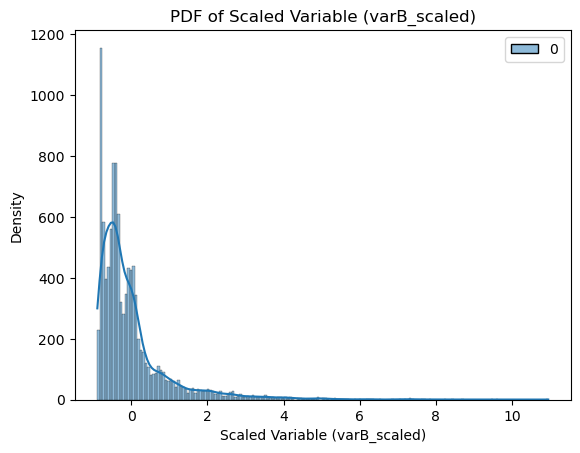

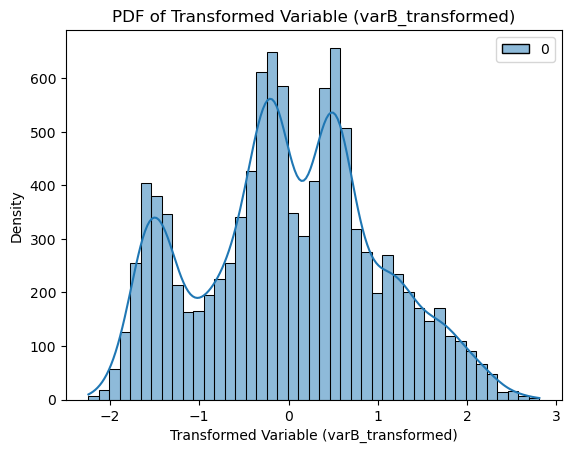

Scaled Variable - Mean: 0.00, Standard Deviation: 1.00, Skewness: 3.02
Transformed Variable - Mean: 0.00, Standard Deviation: 1.00, Skewness: 0.04


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the PDF of the scaled variable
plt.figure()
sns.histplot(varB_scaled, kde=True)
plt.xlabel('Scaled Variable (varB_scaled)')
plt.ylabel('Density')
plt.title('PDF of Scaled Variable (varB_scaled)')
plt.show()

# Plot the PDF of the transformed variable
plt.figure()
sns.histplot(varB_transformed, kde=True)
plt.xlabel('Transformed Variable (varB_transformed)')
plt.ylabel('Density')
plt.title('PDF of Transformed Variable (varB_transformed)')
plt.show()

# Print the results
print("Scaled Variable - Mean: {:.2f}, Standard Deviation: {:.2f}, Skewness: {:.2f}".format(scaled_mean, scaled_std, scaled_skewness))
print("Transformed Variable - Mean: {:.2f}, Standard Deviation: {:.2f}, Skewness: {:.2f}".format(transformed_mean, transformed_std, transformed_skewness))